# Исследование продаж компьтерных игр

Предоставлен набор данных о продажах компьтерных игр. Данные за 2016 год могут быть неполными.

Нужно определить на какие показатели обращать внимание и выявить закономерности, которые определяют успешность видеоигр.

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка и ознакомление с данными

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузим набор данных
df = pd.read_csv('\games.csv')

In [3]:
# выведем информацию для знакомства с полученными данными
display(df.sample(10))
display(df.describe())
display(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3615,NCAA Football 07,XB,2006.0,Sports,0.42,0.12,0.00,0.01,88.0,6.9,E
10726,Dragon Ball: Evolution,PSP,2009.0,Fighting,0.09,0.00,0.00,0.01,28.0,0.9,T
1334,Star Wars: The Force Unleashed II,X360,2010.0,Action,0.95,0.37,0.00,0.11,61.0,5.7,T
753,ATV Offroad Fury 2,PS2,2002.0,Racing,1.92,0.20,0.00,0.06,82.0,8.9,E
1821,Rabbids Go Home,Wii,2009.0,Platform,0.25,0.74,0.00,0.14,78.0,8.3,E10+
5511,Parodius,PS,1994.0,Shooter,0.00,0.00,0.31,0.02,NaN,NaN,NaN
16511,th!nk Logic Trainer,Wii,2009.0,Puzzle,0.01,0.00,0.00,0.00,NaN,NaN,NaN
12066,Catwoman,GC,2004.0,Action,0.05,0.01,0.00,0.00,47.0,6.1,T
15874,Yoake Yori Ruriiro na Portable,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
12829,Gunbird,SAT,1995.0,Shooter,0.00,0.00,0.06,0.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

### Вывод
После знакомства с данными обнаружили:
- одинаковое количество пропусков в названии и жанре игр - возможно одни и те же строки;
- пропуски в столбце год релиза игры, тип данных можно привести к *int*;
- пропуски в рейтингах критиков, пользователей и в возрастном рейтинге.

Также рейтинги критиков и игроков в разной балльной системе - нужно привести к общему виду. В рейтинге пользователей некоторые пропуски указаны через *tbd*, из-за чего тип данных стал *object*.

## Подготовка данных

### Приведём названия столбцов к нижнему регистру

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Проверим пропущенные значения в столбцах `name` и `genre`
И удалим строки при наличии.

In [5]:
display(df.loc[df['name'].isna()])
display(df.loc[df['genre'].isna()])

df = df.loc[df['name'].notna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Предположение подтвердилось, пропуски в одних и тех же строках.\
Пропущены значения в играх на платформе Sega Genesis 1993 года - удалим, чтобы набор данных был более полным.

### Проверим дубликаты по названию, жанру и плафторме
И удалим при их наличии.

In [6]:
display(df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Madden NFL 13 имеет дубликат - оставили одну из строк.

### Приведём рейтинги критиков `critic_score` и игроков `user_score` к одной балльной системе

Для начала приведём строки рейтинга игроков со значением *tbd* к значению *NaN*.\
Так столбец рейтинга будет числовым и значения *NaN* не будут влиять на расчёты.

In [7]:
# выводим количество строк с tbd и NaN до приведения
print("Количество строк рейтинга со значением 'tbd':",
      df.loc[df['user_score'] == 'tbd', 'user_score'].count())
print("Количество строк рейтинга со значением NaN:",
      df.loc[df['user_score'].isna(), 'platform'].count())

# заменяем tbd на NaN
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

# выводим строки с NaN после приведения
print("Количество строк рейтинга после приведения к значению NaN:",
      df.loc[df['user_score'].isna(), 'platform'].count())

# изменим тип данных с object на float
df = df.astype({'user_score': float})

Количество строк рейтинга со значением 'tbd': 2424
Количество строк рейтинга со значением NaN: 6699
Количество строк рейтинга после приведения к значению NaN: 9123


Теперь приведём рейтинг критиков из 100-балльной системы к 10-балльной.

In [8]:
# для этого разделим оценки критиков на 10
df['critic_score'] = df['critic_score'] / 10
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16443.000000,16712.000000,16712.000000,16712.000000,16712.000000,8136.000000,7589.000000
mean,2006.485921,0.263318,0.145053,0.077629,0.047346,6.896595,7.125260
std,5.875546,0.813587,0.503373,0.308880,0.186747,1.393815,1.499989
min,1980.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,7.100000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,7.900000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,9.800000,9.700000


Привели рейтинги к одной системе баллов и исправили тип данных на числовой.

### Возрастной рейтинг `rating`

In [9]:
# выведем на экран уникальные значения по столбцу
print(f"Наименования возрастных рейтингов:\n{df['rating'].unique()}")

Наименования возрастных рейтингов:
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


- «EC» — «Early childhood»: Игра подходит для детей от 3 лет
- «E» — «Everyone»: Содержание подходит для всех возрастов (ранее с 6 лет)
- «K-A» — «Kids to Adults»: предыдущее название рейтинга E
- «E10+» — «Everyone 10 and older»: подходит для детей старше 10 лет
- «T» — «Teen»: игра подходит для подростков старше 13 лет
- «M» — «Mature»: игра подходит для подростков старше 17 лет
- «AO» — «Adults Only 18+»: для взрослых старше 18 лет
- «RP» — «Rating Pending»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга

Следовательно можем заменить более ранний рейтинг *K-A* на современный аналог *E*.\
Пропуски заменим на *unrated*.

In [10]:
# выводим количество строк с K-A и E до приведения
print("Количество строк с рейтингом 'E':",
      df.loc[df['rating'] == 'E', 'rating'].count())
print("Количество строк с рейтингом K-A:",
      df.loc[df['rating'] == 'K-A', 'rating'].count())

# заменяем K-A на E
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

# выводим строки с E после приведения
print("Количество строк c рейтингом E после приведения:",
      df.loc[df['rating'] == 'E', 'rating'].count())

# пропуски заменяем на unrated
df['rating'] = df['rating'].fillna('unrated')

# выведем уникальные значения для проверки изменений
print(f"Наименования возрастных рейтингов после изменений:\n{df['rating'].unique()}")

Количество строк с рейтингом 'E': 3989
Количество строк с рейтингом K-A: 3
Количество строк c рейтингом E после приведения: 3992
Наименования возрастных рейтингов после изменений:
['E' 'unrated' 'M' 'T' 'E10+' 'AO' 'EC' 'RP']


### Игровые платформы `platform`

In [11]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Пропусков в столбце нет, неявных дубликатов также не выявлено.

### Год релиза игры `year_of_release`

Приведём год релиза к типу данных *int*.
Также проверим количество пропущенные значений, если пропусков не так много - удалим.

In [12]:
# меняем тип данных в столбце год релиза
df = df.astype({'year_of_release': 'Int32'})

In [13]:
print(f"Количество пропусков: {(df['year_of_release'].isna().sum())}")
print(f"Процент пропусков: {(df['year_of_release'].isna().sum()/ len(df['year_of_release'])):.2%}")

Количество пропусков: 269
Процент пропусков: 1.61%


Пропусков мало - удаляем.

In [14]:
df = df.dropna(subset=['year_of_release'])

### Добавим столбец с общей суммой продаж по регионам

In [15]:
# добавим столбец с мировыми продажами
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Вывод

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  world_sales      16443 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 1.6+ MB


Подготовили данные для дальнейшего исследования:
- удалили строки с пропусками в названиях, жанрах и году релиза, т.к. их немного, а результаты будут точнее
- обработали рейтинги игроков и критиков, поменяли тип данных и привели к общей 10-балльной системе
- скорректировали категории рейтингов - объединили категории разных времён и заменили пропуски на значения *unrated*
- поменяли тип данных в столбце год релиза, привели к целочисленному типу
- добавили столбец с мировыми продажами, объединив показатели отдельных регионов.

Среди причин пропусков можно выделить:
- рейтинг ESRB появился в 1994 году, до этого года по играм рейтинг не выставлялся. Также этот рейтинг используется для американского рынка, если игры не издавались для данного региона - большая вероятность, что рейтинг не будет установлен.
- происхождение оценок игроков и критиков не описано, возможно сервис оценивания не содержит все игры из набора данных.

## Исследовательский анализ данных
Нам нужно определить период, который следует взять для анализа продаж.

### Количество игр по годам релиза
Посмотрим, сколько игр выпускалось в разные годы.

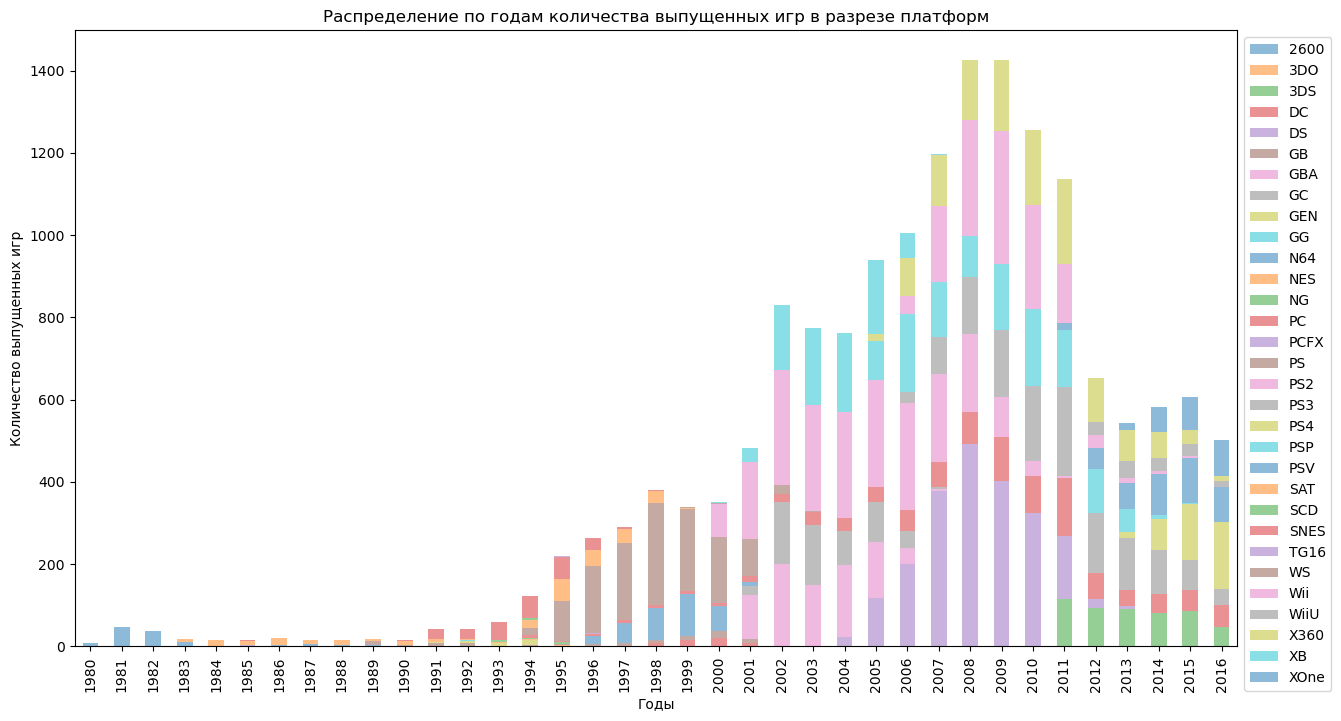

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))

df.pivot_table(index='platform',
              columns='year_of_release',
              values='name',
              aggfunc='count').T.plot(kind='bar',stacked=True, ax=ax, figsize=(15,8), alpha=0.5)
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_xlabel('Годы')
ax.set_ylabel('Количество выпущенных игр')
ax.set_title('Распределение по годам количества выпущенных игр в разрезе платформ')

plt.show()

До начала 90-х игр выпускалось мало.\
Далее, с развитием микропроцессоров, начался рост по выпуску игр, который продолжался до 2010 года.\
Далее, возможно, с задержкой сыграл кризис 2008 года, т.к. компании начали сокращать расходы и инвестиции.\
Также могли сыграть на количество платформенных игр - онлайн-игры, начавшие выходить в это время, а с появлением смартфонов - мобильные игры.

По количеству игр стоит убрать данные до 1995 года, т.к. их количество было малым на тот момент.\
Проверим, что нам скажут продажи и игровые платформы для окончательного решения.

### Продажи игр по платформам
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

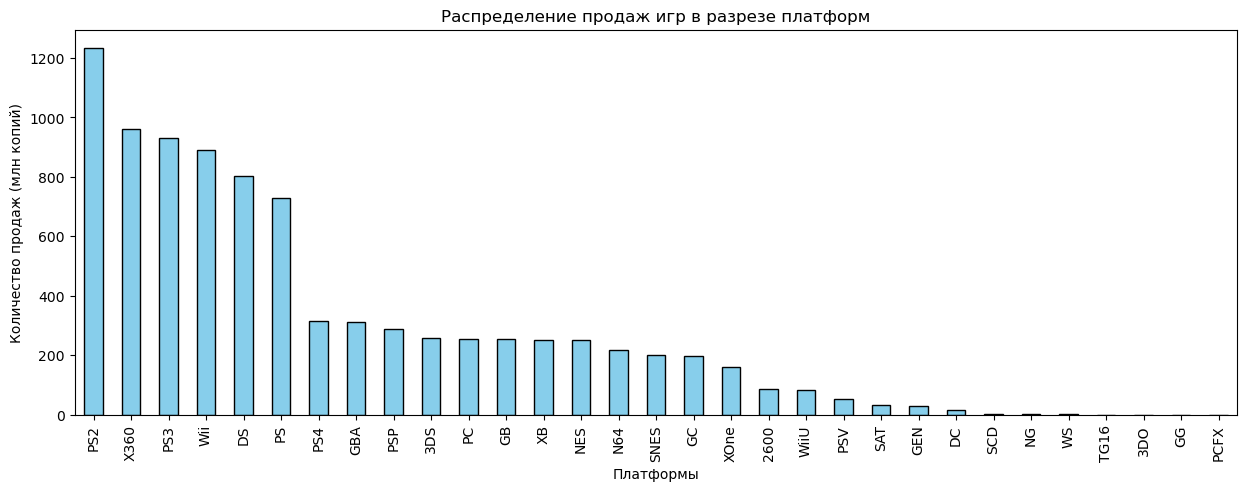

In [18]:
# выведем продажи по платформам
plt.figure(figsize=(15,5))
plt.ticklabel_format(style='plain')
ax = df.groupby('platform')['world_sales'].sum().sort_values(ascending=False).plot.bar(color='skyblue', edgecolor='black')
plt.title('Распределение продаж игр в разрезе платформ')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж (млн копий)')
plt.show()

Видим, что треть производителей имеют низкие продажи, скорее всего это уже устаревшие платформы.\
Также есть современные платформы такие как PS4 и XBOX One, которые не успели обогнать свои младшие поколения.\
Выведем топ-6 платформ, которые имеют максимальные продажи и посмотрим их динамику по годам.

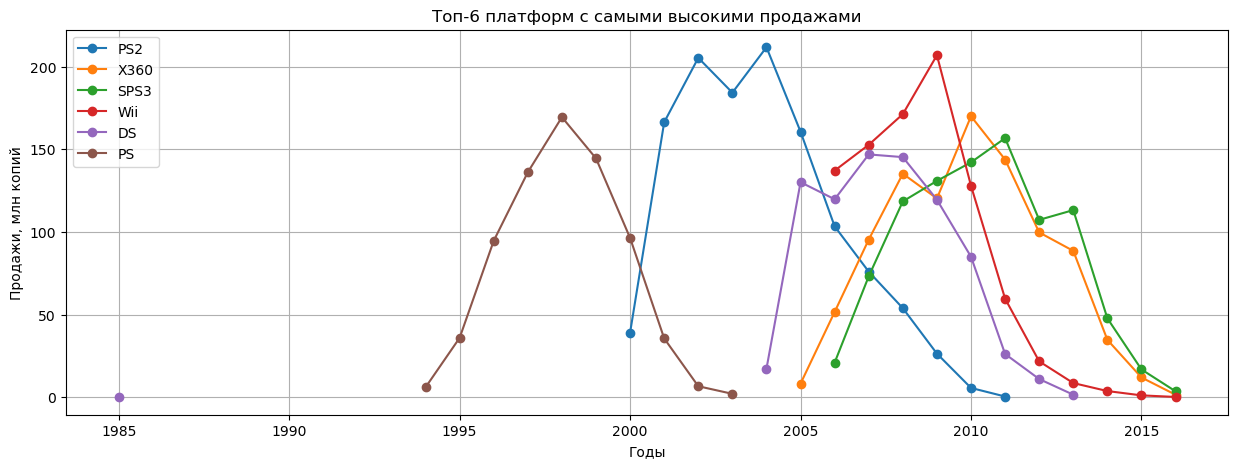

In [19]:
# сделаем сводную таблицу
platform_sales = df.pivot_table(index='platform', values = 'world_sales', columns='year_of_release', aggfunc='sum').T

# построим график
plt.figure(figsize=(15, 5))
plt.plot(platform_sales['PS2'], marker ='o', label='PS2')
plt.plot(platform_sales['X360'], marker ='o', label='X360')
plt.plot(platform_sales['PS3'], marker ='o', label='SPS3')
plt.plot(platform_sales['Wii'], marker ='o', label='Wii')
plt.plot(platform_sales['DS'], marker ='o', label='DS')
plt.plot(platform_sales['PS'], marker ='o', label='PS')
plt.title('Топ-6 платформ с самыми высокими продажами')
plt.xlabel('Годы')
plt.ylabel('Продажи, млн копий')
plt.grid()
plt.legend(loc='upper left')
plt.show()

### Актуальный период

Видим, что платформы имеют цикличность, новые поколения консолей приходят на смену старым - как раз такие данные нам и нужны для анализа грядущих продаж.\
Видно, что активная жизнь платформ в среднем занимает 10 лет - целесообразно взять для анализа продаж отрезок в 5 лет, куда попадут "угасающие" и современные платформы. Эти данные помогут построить прогноз на 2017 год.

In [20]:
df_actual = df.loc[df['year_of_release'] > 2011]
df_actual.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,2885.0,2885.000000,2885.000000,2885.000000,2885.000000,1311.000000,1530.000000,2885.000000
mean,2013.917504,0.204842,0.175671,0.066752,0.054128,7.225019,6.636863,0.501393
std,1.411559,0.566781,0.505424,0.241614,0.164664,1.268846,1.569277,1.249340
min,2012.0,0.000000,0.000000,0.000000,0.000000,1.300000,0.200000,0.010000
25%,2013.0,0.000000,0.000000,0.000000,0.000000,6.600000,5.800000,0.040000
50%,2014.0,0.030000,0.030000,0.010000,0.010000,7.400000,7.000000,0.120000
75%,2015.0,0.170000,0.140000,0.050000,0.040000,8.100000,7.800000,0.430000
max,2016.0,9.660000,9.090000,4.390000,3.960000,9.700000,9.300000,21.050000


### Актуальные платформы
Посмотрим, какие платформы лидируют по продажам, растут или падают, и выберем несколько потенциально прибыльных.

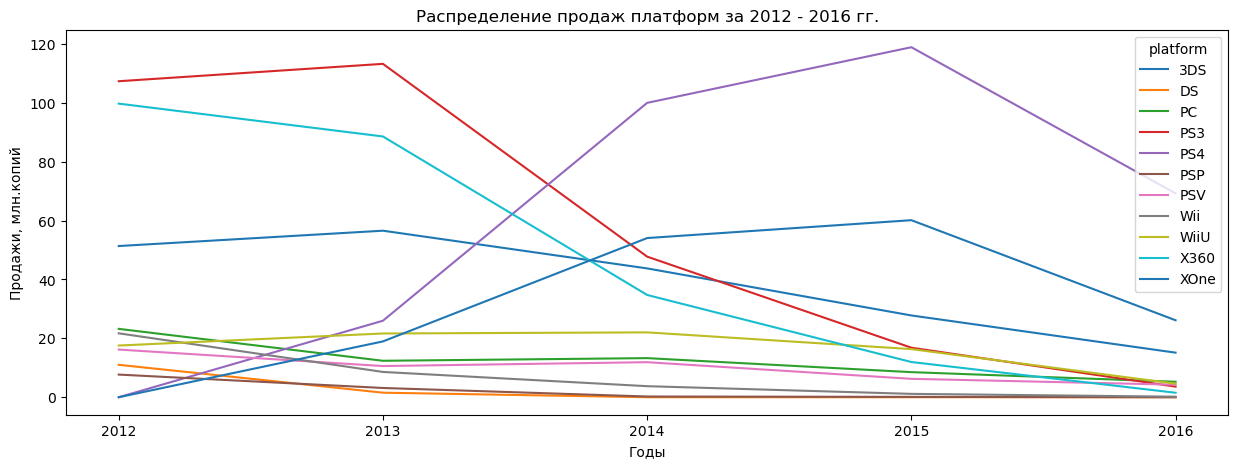

In [21]:
# сделаем сводную по продажам за последние 5 лет
data_sales = df_actual.pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'world_sales', 
    aggfunc = 'sum'
    ).fillna(0)

# выводим график
ax = data_sales.plot(xticks=data_sales.index.astype('int'), figsize=(15,5))
ylab = ax.set_ylabel('Продажи, млн.копий')
xlab = ax.set_xlabel('Годы')
plt.title('Распределение продаж платформ за 2012 - 2016 гг.')
plt.show()  

Самыми потенциально прибыльными платформами являются Sony PlayStation 4 и Xbox One от Microsoft, которые вышли недавно и находятся на подъёме/пике, учитывая неполные данные за 2016 год.\
Какое-то время будут актуальны игры для платформ Nintendo 3DS, Wii U, Xbox 360 и PlayStation 3.

Обновим таблицу с актуальными данными для анализа продаж, добавив сортировку по платформам, которые остаются перспективными или не совсем устаревшими.

In [22]:
df_actual = df_actual.query('platform in ["PS4", "XOne", "PS3", "X360", "WiiU", "3DS"]')
df_actual.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,1966.0,1966.000000,1966.000000,1966.000000,1966.000000,999.000000,1170.000000,1966.000000
mean,2014.019329,0.274008,0.224730,0.078311,0.071770,7.160861,6.597094,0.648820
std,1.384624,0.656661,0.591329,0.278367,0.194425,1.322656,1.537546,1.450764
min,2012.0,0.000000,0.000000,0.000000,0.000000,1.300000,0.200000,0.010000
25%,2013.0,0.000000,0.000000,0.000000,0.000000,6.500000,5.800000,0.060000
50%,2014.0,0.060000,0.050000,0.010000,0.020000,7.400000,6.900000,0.190000
75%,2015.0,0.260000,0.200000,0.060000,0.060000,8.100000,7.800000,0.620000
max,2016.0,9.660000,9.090000,4.390000,3.960000,9.700000,9.200000,21.050000


### Глобальные продажи игр в разбивке по платформам
Отобразим глобальные продажи по тем платформам, которые выявили как актуальные для анализа.

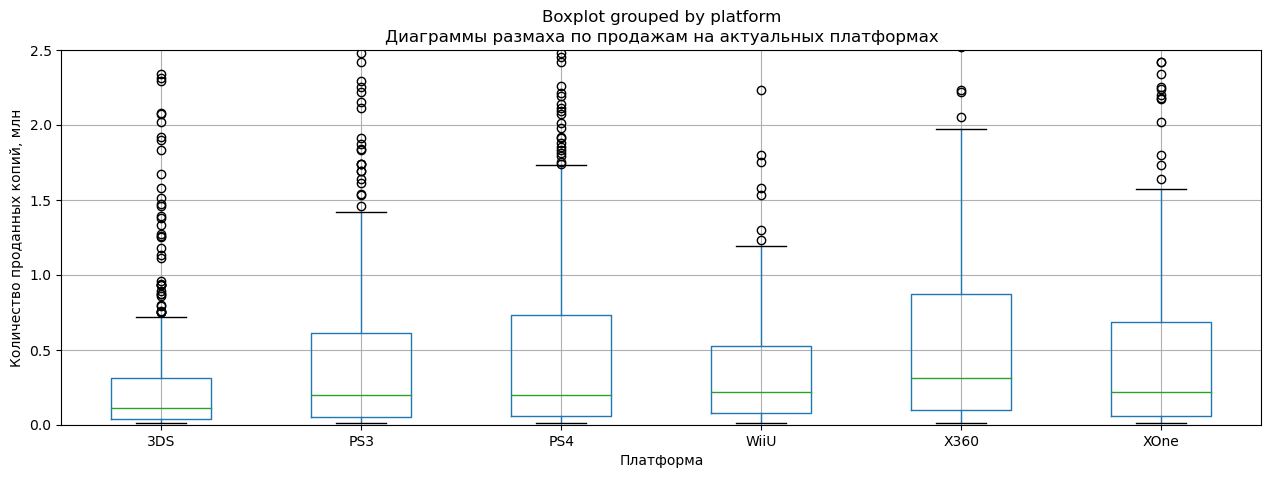

In [23]:
df_actual.boxplot(column='world_sales', by='platform', figsize=(15,5))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам на актуальных платформах')
plt.ylim(0, 2.5)
plt.show()

Медианные значения продаж смещены к нижнему краю – то есть на всех платформах выходит много игр с относительно небольшими продажами.\
При этом везде есть небольшое количество бестселлеров, продажи которых могут многократно превышать обычные значения.

### Зависимость между отзывами и продажами
Посмотрим как сильно рейтинги критиков и игроков коррелируют с продажами PS4.

C:\Users\eugen\AppData\Local\Temp\ipykernel_16052\720939139.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(df_actual


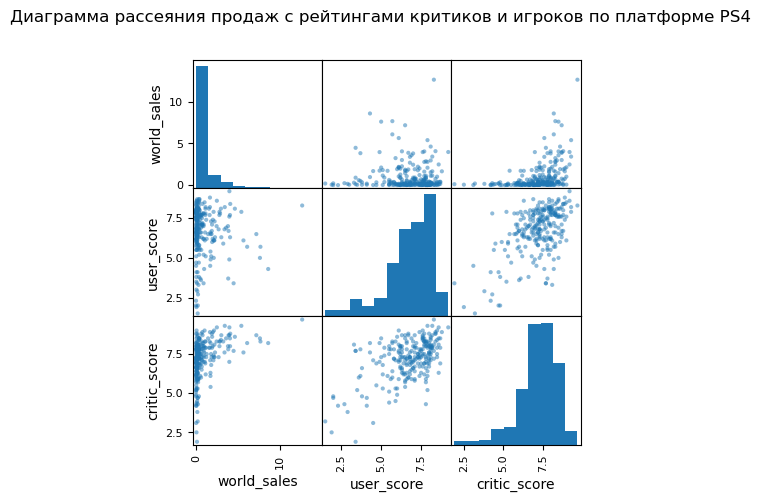

Корреляция между оценками и продажами для платформы PS4


,world_sales,user_score,critic_score
world_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


In [24]:
# выведем диаграмму рассеяния для платформы PS4 с оценками критиков и игроков
fig, ax = plt.subplots(figsize = (5,5))
pd.plotting.scatter_matrix(df_actual
                           .loc[df_actual['platform'] == 'PS4'][['world_sales','user_score', 'critic_score']], ax=ax)
fig.suptitle(f'Диаграмма рассеяния продаж с рейтингами критиков и игроков по платформе PS4')
plt.show()

# выведем корреляцию между отзывами и продажами PS4
print("Корреляция между оценками и продажами для платформы PS4")
display(df_actual.loc[df_actual['platform'] == 'PS4'][['world_sales','user_score', 'critic_score']].agg('corr'))

Для платформы PS4 видна прямая корреляция между оценкой критиков и продажами, а также между оценками критиков и игроков.\
Выведем показатели корреляций для других платформ.

In [25]:
#  выведем зависимости между оценками и продажами
for platform in ["3DS", "WiiU", "PS3", "X360", "XOne"]:
    print(platform)
    platform_select = df_actual.query('platform == @platform')
    print(f'Корреляция между оценкой критиков и продажами: {platform_select.critic_score.corr(platform_select.world_sales):.2}')
    print(f'Корреляция между оценкой игроков и продажами: {platform_select.user_score.corr(platform_select.world_sales):.2}')
    print(f'Корреляция между оценками критиков и пользователей: {platform_select.critic_score.corr(platform_select.user_score):.2}')
    print()

3DS
Корреляция между оценкой критиков и продажами: 0.32
Корреляция между оценкой игроков и продажами: 0.2
Корреляция между оценками критиков и пользователей: 0.72

WiiU
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой игроков и продажами: 0.4
Корреляция между оценками критиков и пользователей: 0.77

PS3
Корреляция между оценкой критиков и продажами: 0.33
Корреляция между оценкой игроков и продажами: -0.0062
Корреляция между оценками критиков и пользователей: 0.54

X360
Корреляция между оценкой критиков и продажами: 0.36
Корреляция между оценкой игроков и продажами: 0.0062
Корреляция между оценками критиков и пользователей: 0.56

XOne
Корреляция между оценкой критиков и продажами: 0.42
Корреляция между оценкой игроков и продажами: -0.069
Корреляция между оценками критиков и пользователей: 0.47



По всем платформам видна прямая корреляция между оценкой критиков и продажами, а также между оценками критиков и игроков.\
А вот оценки пользователей не зависимы с продажами, возможно рейтинги на эмоциях создают разницу.\
Отслеживается слабая связь только на платформах компании Nintendo. Возможно, у них не такое большое сообщество по сравнению с Sony и Microsoft, зато самое лояльное.

### Общее распределение игр по жанрам
Посмотрим, выделяются ли жанры с высокими и низкими продажами.

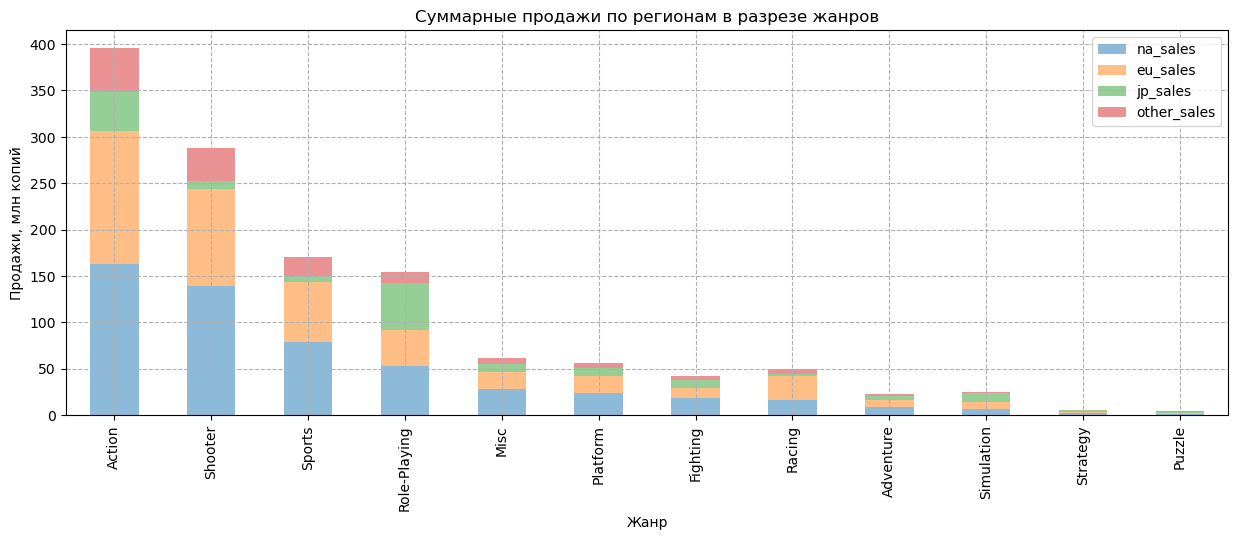

In [26]:
fig, ax = plt.subplots()

(df_actual
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .agg('sum')
 .sort_values('na_sales', ascending=False)
 .plot(kind='bar',stacked=True, ax=ax, figsize=(15,5), alpha=0.5))

ax.set_title('Суммарные продажи по регионам в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

Выделяется лидер среди жанров - *Action*.\
На втором месте *Shooter*, на третьем-четвёртом месте расположились *Sports* и *Role-Playing*.\
Среди непопулярных жанров - *Strategy* и *Puzzle*.

Проверим также средние значения продаж игр по разным жанрам, возможно некоторые игры имеют многомиллионные продажи, которые влияют на продажи целого жанра.

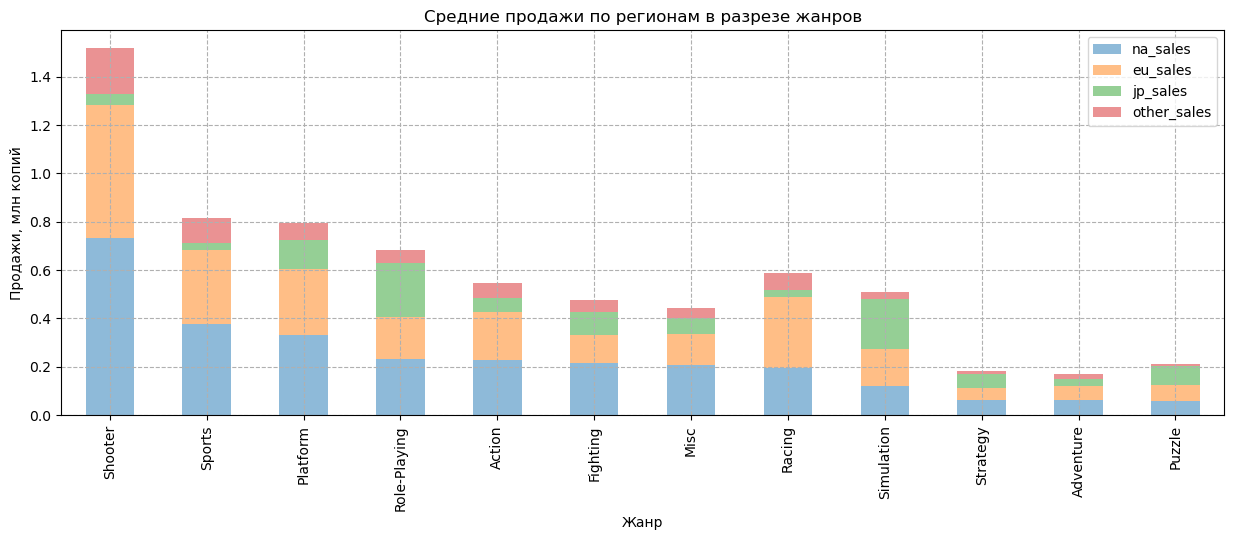

In [27]:
fig, ax = plt.subplots()

(df_actual
 .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
 .agg('mean')
 .sort_values('na_sales', ascending=False)
 .plot(kind='bar',stacked=True, ax=ax, figsize=(15,5), alpha=0.5))

ax.set_title('Средние продажи по регионам в разрезе жанров')
ax.set_ylabel('Продажи, млн копий')
ax.set_xlabel('Жанр')
ax.grid(linestyle='--')
plt.show()

Действительно, топ жанров изменился.\
*Шутеры* являются в среднем самым продаваемым жанром.\
А вот лидер по глобальным продажам - *Экшен*, содержит много "проходных" игр и бестселлеры, которые сильно влияют на общую картину. Вместо него в топ-4 присоединились *Платформеры*.\
*Спортивные* и *Ролевые* игры также, как и в графике глобальных продаж находятся в топ-4.

### Вывод
В среднем жизненный цикл платформы составляет около 10 лет. Для анализа продаж взяли половину - 5 лет.\
На данный момент среди консолей PlayStation 4 и XBox One находятся на подъеме, Nintendo 3DS, Wii U, Xbox 360 и PlayStation 3 миновали пик популярности.\
Наиболее популярными жанрами являются спортивные игры, шутеры, платформеры и RPG.\
Несмотря на огромные суммарные продажи бестселлеров, экшены в среднем не являются лидерами продаж, т.к. содержат много проходных игр. При этом есть смысл следить за оценками критиков, которые коррелируют с продажами, и продавать нашумевшие новинки этого жанра.

## Составим портрет пользователя каждого региона

Для начала сделаем функции, чтобы не дублировать код.

In [28]:
# сделаем функцию для будущих сводных таблиц
def pivot(data, index):
    return data.pivot_table(
    index = index,
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc =  'sum'
).apply(
    lambda col: col / col.sum(), 
    axis=0
)

# также сделаем функцию для вывода тепловой карты по сводной таблице
def heatmap(data, title, ylabel):
    plt.figure(figsize=(15, 5))
    sns.heatmap(data, annot=True, fmt=".0%", cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
    plt.title(title)
    plt.xlabel('Регионы')
    plt.ylabel(ylabel)
    plt.show()

### Определим самые популярные платформы для каждого региона (NA, EU, JP)

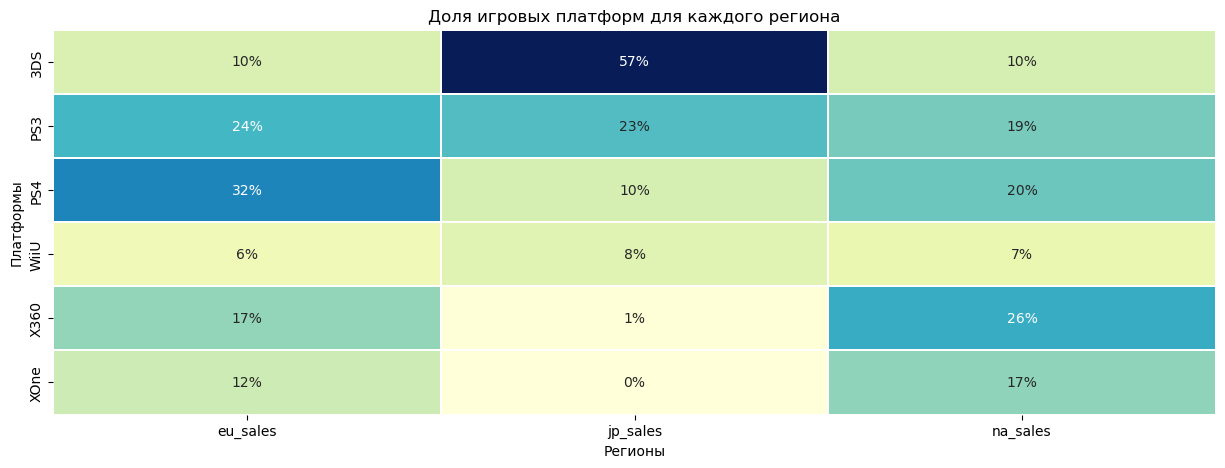

In [29]:
# сделаем сводную таблицу с распределением игровых платформ по каждому региону и выведем тепловую карту
platform_sales = pivot(df_actual, 'platform')
heatmap(platform_sales, 'Доля игровых платформ для каждого региона', 'Платформы')

Рынки Европы и Америки в целом схожи, различие только в лидирующей платформе: в Европе это Sony Playstation 4, а в Америке небольшой отрыв у приставок Microsoft Xbox360.\
При этом на американском рынке растёт доля приставки Sony нового поколения, что нельзя сказать об Xbox One - американцы меняют платформу.\
На рынке Японии лидером с большим отрывом является портативная приставка Nintendo 3DS. Скорее всего, трудолюбивые японцы так проводят время в дороге до работы и домой. Среди стационарных приставок уверенное второе место занимает Sony Playstation 3.

### Определим самые популярные жанры для каждого региона (NA, EU, JP)

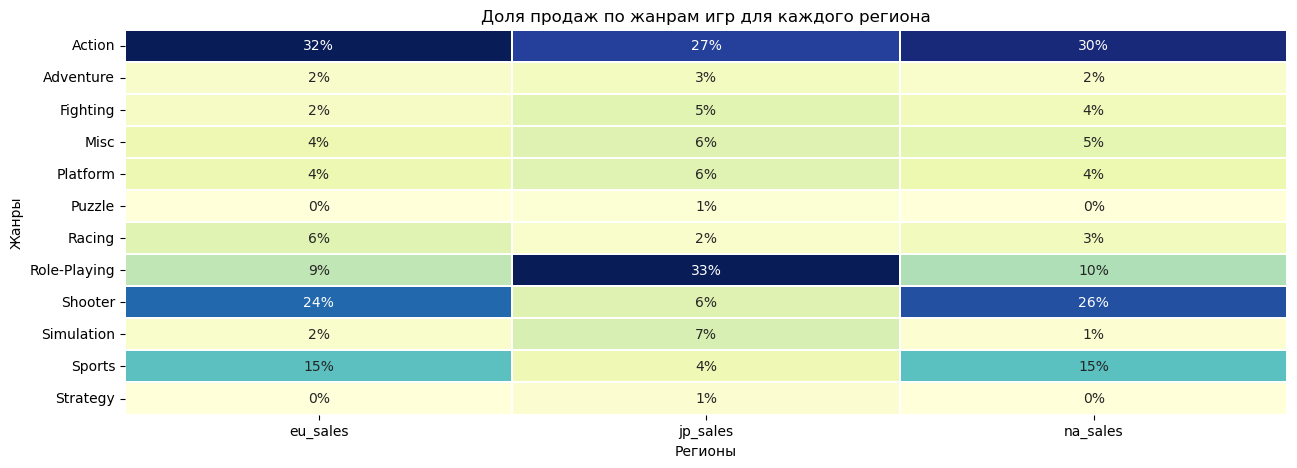

In [30]:
# выведем сводную таблицу с распределением жанров по каждому региону и выведем тепловую карту
genre_sales = pivot(df_actual, 'genre')
heatmap(genre_sales, 'Доля продаж по жанрам игр для каждого региона', 'Жанры')

По жанрам игр рынки Европы и Америки ещё сильнее схожи - лидерами продаж являются жанры Экшен, Шутеры, Спорт и RPG, которые занимают около 80% рынка.

В Японии лидером является жанр RPG, на втором месте идёт Экшен - они вдвоём взяли на себя 60% рынка.\
Третье место занимают Симуляторы с долей в 7%. Остальные жанры занимают от 1 до 6% рынка.

### Влияние рейтинга ESRB на продажи в отдельном регионе

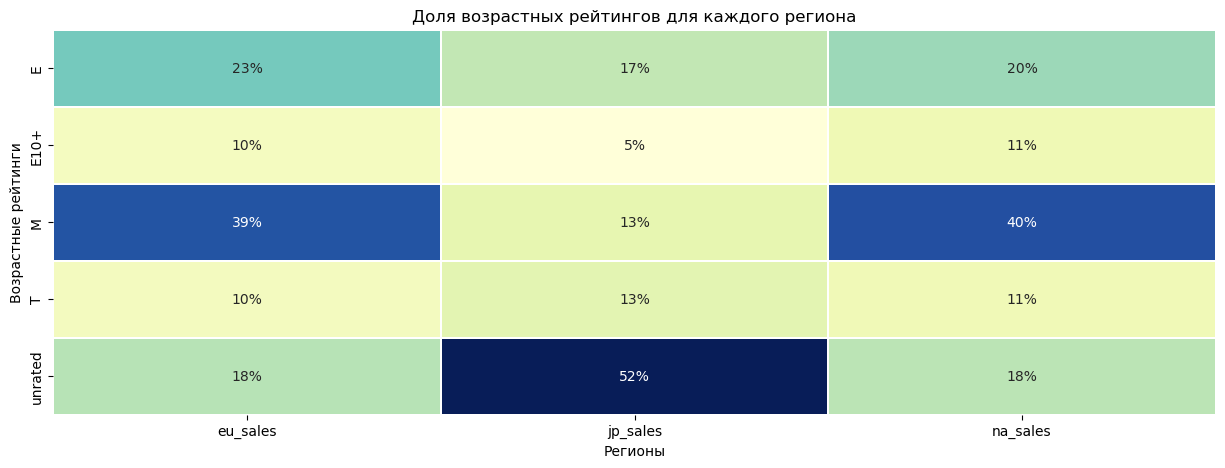

In [31]:
# выведем сводную таблицу с распределением рейтингов по каждому региону и выведем тепловую карту
rating_sales = pivot(df_actual, 'rating')
heatmap(rating_sales, 'Доля возрастных рейтингов для каждого региона', 'Возрастные рейтинги')

И снова Америка схожа с Европой.\
Лидируют игры с рейтингом "старше 17 лет" - 40% от общего объёма.\
На втором месте игры "для всех возрастов", на третьем месте игры без рейтинга. Четвёртое-пятое место делят игры с рейтингом для детей "от 10" и "от 13" лет.

В Японии большая часть игр продаётся без рейтинга, т.к. основная зона использования рейтинга - Америка и Канада.\
Либо часть игр не проходит японскую цензуру, т.к. игры "для всех возрастов" практически не теряют свою долю, что нельзя сказать о играх "старше 17 лет".

### Вывод
Заметили, что американский и европейский рынки очень похожи:
- популярные жанры игр схожи - Экшен, Шутеры, Спорт и RPG;
- рейтинги игр совпадают - лидируют игры с рейтингом "старше 17 лет", на втором месте игры "для всех возрастов";
- есть небольшое различие в платформах, при этом консоль Sony Playstation 4 и здесь начинает объединять эти регионы, являясь основным претендентом на лидерство в следующие годы.

А вот Япония совсем отличается от других регионов - здесь популярна портативная консоль Nintendo 3DS.
Из этого вытекают следующие расхождения:
- жанры игр различны - не все игры подходят для портативных приставок, например, Шутеры. Лидером является жанр RPG, на втором месте идёт Экшен - они вдвоём взяли 60% рынка. Третье место занимают Симуляторы.
- 52% игр не получили рейтинг ESRB, т.к. он в основном предназначен для американского рынка - местные японские игры для Nintendo не регистрировались. Также портативные приставки обычно имеют более простой геймплей из-за менее производительного железа - преобладают игры "для всех возрастов". Второе и третье место делят игры для лиц "от 13 лет" и "старше 17 лет".\
Если рассматривать нишу стационарных консолей, то в Японии также преобладают приставки Sony.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC
Для проверки гипотез подойдёт двусторонний тест, чтобы проверить различия средних оценок игроков выбранных платформ в любую из сторон.\
По умолчанию всегда считаем, что разницы нет, пока не докажем обратное.\
Используем критерий Стьюдента, т.к. выборки распределены нормально.

Зададим гипотезы:\
$\begin{equation*}
 \begin{cases}
   H_0 :\text{средние показатели рейтингов PC и Xbox One не отличаются}\\
   H_1 :\text{средние показатели рейтингов PC и Xbox One имеют различия}
 \end{cases}
\end{equation*}$

In [32]:
# выведем средние пользовательские рейтинги платформ PC и Xbox One
display(df.query('platform in ["XOne", "PC"]')
        .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median']))

alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df[(df.platform == "XOne") & (df.user_score.notna())]['user_score'], 
    df[(df.platform == "PC") & (df.user_score.notna())]['user_score'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - средние показатели рейтингов PC и Xbox One имеют различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу - показатели рейтингов PC и Xbox One не отличаются')

,count,mean,median
,user_score,user_score,user_score
platform,,,
PC,755,7.065960,7.5
XOne,182,6.521429,6.8


p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу - средние показатели рейтингов PC и Xbox One имеют различия


Видно, что оценок от пользователей персональных компьютеров больше и оценка значительно выше, что и подтвердилось статистически.

### Средние пользовательские рейтинги жанров Action и Sports
Для проверки гипотез используем двусторонний тест, где проверим различия средних оценок игроков по жанрам в любую из сторон.\
По умолчанию всегда считаем, что разницы нет, пока не докажем обратное.\
Используем критерий Стьюдента, т.к. выборки распределены нормально.

Зададим гипотезы:\
$\begin{equation*}
 \begin{cases}
   H_0 :\text{средние пользовательские рейтинги жанров Action и Sports не отличаются}\\
   H_1 :\text{средние пользовательские рейтинги жанров Action и Sports имеют различия}
 \end{cases}
\end{equation*}$

In [33]:
# выведем Средние пользовательские рейтинги жанров Action и Sports
display(df.query('genre in ["Action", "Sports"]')
        .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median']))

alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    df[(df.genre == "Action") & (df.user_score.notna())]['user_score'], 
    df[(df.genre == "Sports") & (df.user_score.notna())]['user_score'],
    equal_var=False
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports имеют различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports не отличаются')

,count,mean,median
,user_score,user_score,user_score
genre,,,
Action,1796,7.058129,7.4
Sports,1080,6.952778,7.4


p-значение: 0.07751671595536253
Не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports не отличаются


Действительно, оценки пользователей по данным жанрам не имеют сильных различий.

## Общий вывод

В рамках проекта нам предстояло проанализировать продажи видеоигр, чтобы спланировать кампанию на 2017 год.

Был предоставлен список продаваемых игр за период с 1980 по 2016 год.\
Данные содержали сведения о жанре игр, годе релиза, платформе на которой игра вышла, продажах по основным мировым регионам, оценки критиков и игроков, а также возрастной рейтинг.

Во время предобработки:
- удалили незначительное количество строк с пропуском в названиях игр и дате релиза
- также обнаружили и удалили дубликаты по названиям игры, году релиза и платформе
- балльные системы оценок критиков и игроков различались - привели к 10-балльной системе
- поменяли тип данных в столбце год релиза, привели к целочисленному типу
- добавили столбец с мировыми продажами, объединив показатели отдельных регионов

На стадии исследовательского анализа поняли, что **средний жизненный цикл платформы составляет около 10 лет. Для анализа продаж лучше брать 5 лет, чтобы отсеять устаревающие платформы и не упустить новые**.\
На данный момент среди консолей **PlayStation 4 и XBox One - лидирующие**, Nintendo 3DS, Wii U, Xbox 360 и PlayStation 3 миновали пик популярности.\
**Наиболее популярными жанрами являются спортивные игры, шутеры, платформеры и RPG**.\
**По глобальным продажам лидирует жанр Экшен**, при этом данный жанр содержит много проходных игр. **Есть смысл следить за оценками критиков по Экшен-играм, которые коррелируют с продажами, и продавать нашумевшие новинки этого жанра**.

При составлении портрета среднестатистического пользователя каждого региона заметили, что **американский и европейский рынки очень похожи**:

- популярные жанры игр схожи - **Экшен, Шутеры, Спорт и RPG**;
- рейтинги игр совпадают - **лидируют игры с рейтингом "старше 17 лет", на втором месте игры "для всех возрастов"**;
- есть небольшое различие в платформах, при этом **консоль Sony Playstation 4 и здесь начинает объединять эти регионы, являясь основным претендентом на лидерство в следующие годы**.

А вот **Япония совсем отличается от других регионов** - здесь популярна портативная консоль Nintendo 3DS. Из этого вытекают следующие расхождения:
- жанры игр различны - не все игры подходят для портативных приставок, например, Шутеры. Лидером является жанр RPG, на втором месте идёт Экшен - они вдвоём взяли 60% рынка. Третье место занимают Симуляторы.
- 52% игр не получили рейтинг ESRB, т.к. он в основном предназначен для американского рынка - местные японские игры для Nintendo не регистрировались. Также портативные приставки обычно имеют более простой геймплей из-за менее производительного железа - преобладают игры "для всех возрастов". Второе и третье место делят игры для лиц "от 13 лет" и "старше 17 лет".
**Если рассматривать нишу стационарных консолей, то в Японии также преобладают приставки Sony.**

Дополнительно проверили гипотезы средние пользовательские рейтинги среди платформ Xbox One и PC, а также среди жанров Action и Sports.
- обнаружили, что пользовательские оценки пк-игроков отличаются от оценок владельцев Xbox One.
- по жанрам игр Action и Sports оценки игроков статистически не различаются.